Importing the necessary Libraries and Frameworks

In [5]:
import os
import warnings
import numpy as np
import pandas as pd
from sklearn import metrics, model_selection
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings("ignore")

Loading, Analyzing and Visualizing the Data

In [6]:
path = "D:/Project/ADNI/Axial"

datagen = ImageDataGenerator(rescale = 1.0 / 255.0)

data = datagen.flow_from_directory(directory = path, target_size = (128, 128), batch_size = 7000)


Found 5154 images belonging to 3 classes.


In [7]:
X = data[0][0]
y = data[0][1]

In [8]:
y = np.array([np.argmax(y_) for y_ in y])

In [9]:
labels = ["AD", "CI", "CN"]

In [10]:
print(pd.Series(y).value_counts())

1    2590
2    1440
0    1124
Name: count, dtype: int64


Data Preprocessing and Preparation

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state = 3, test_size = 0.2, stratify = y)

print(X_train.shape, X_test.shape)

(4123, 128, 128, 3) (1031, 128, 128, 3)


In [13]:
y_train_label_counts = pd.Series(y_train).value_counts()
y_test_label_counts = pd.Series(y_test).value_counts()

print(y_train_label_counts, "\n\n")
print(y_test_label_counts)

1    2072
2    1152
0     899
Name: count, dtype: int64 


1    518
2    288
0    225
Name: count, dtype: int64


Training the Model and Evaluating it's performance

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 100, kernel_size = (3, 3), input_shape = X_train[0].shape, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 3, activation = "softmax")
])

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 21s 148ms/step - accuracy: 0.5412 - loss: 1.1520
Epoch 2/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.9296 - loss: 0.2754
Epoch 3/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.9911 - loss: 0.0680
Epoch 4/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - accuracy: 0.9999 - loss: 0.0177
Epoch 5/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - accuracy: 1.0000 - loss: 0.0142


In [17]:
# Evaluating the model on the train set

loss, acc = model.evaluate(X_train, y_train)

129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 1.0000 - loss: 0.0051


In [18]:
# Making predictions on train set

y_train_pred = model.predict(X_train)
y_train_pred_labels = np.array([np.argmax(y_) for y_ in y_train_pred])

129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step


In [19]:
# Classification Report

clf_report = metrics.classification_report(y_train, y_train_pred_labels)

print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       899
           1       1.00      1.00      1.00      2072
           2       1.00      1.00      1.00      1152

    accuracy                           1.00      4123
   macro avg       1.00      1.00      1.00      4123
weighted avg       1.00      1.00      1.00      4123



Validating the Model

In [20]:
# Validating the model on the training set

model.evaluate(X_test, y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9969 - loss: 0.0165


[0.015633350238204002, 0.997090220451355]

In [21]:
# Making predictions on test set

y_test_pred = model.predict(X_test)
y_test_pred_labels = np.array([np.argmax(y_) for y_ in y_test_pred])

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [22]:
# Classification Report

clf_report = metrics.classification_report(y_test, y_test_pred_labels)

print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       518
           2       1.00      0.99      1.00       288

    accuracy                           1.00      1031
   macro avg       1.00      1.00      1.00      1031
weighted avg       1.00      1.00      1.00      1031



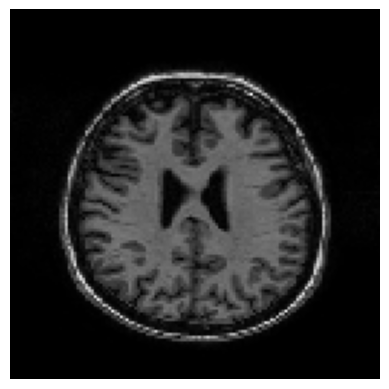

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
98.54% chances are there that the image is CN.


In [28]:
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load the image
img_path = "D:/Project/ADNI/Axial/CN/CN002_S_0413a086.png"  # Update with the path to your image
img = load_img(img_path, target_size=(128, 128))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Preprocess the image
img_array = img_to_array(img)
img_array = img_array / 255.0  # Normalize the pixel values
img_array = img_array.reshape(1, 128, 128, 3)  # Reshape to match the input shape

# Make predictions
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
confidence = np.max(prediction) * 100

# Interpret the prediction
class_indices = {v: k for k, v in data.class_indices.items()}  # Assuming data is your ImageDataGenerator
predicted_label = class_indices[predicted_class]

print(f"{confidence:.2f}% chances are there that the image is {predicted_label}.")
